# Elvis Revisited

In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot

### The Basic Problem
Traditionally, the Elvis problem goes like this:

_Elvis Presley had a twin brother who died at birth.  What is the probability that Elvis was an identical twin?_

A bit of research reveals that about 8% of twins are monozygous, giving us this (pretty straightforward) prior distribution:

No handles with labels found to put in legend.


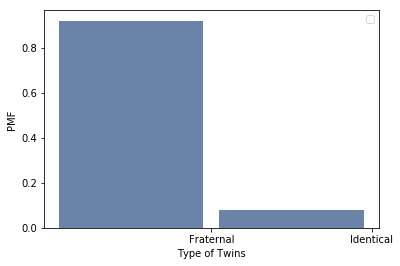

In [20]:
twins = Pmf(['Identical', 'Fraternal'])
twins['Identical'] = 0.08
twins['Fraternal'] = 0.92
thinkplot.Hist(twins)
thinkplot.Config(xlabel='Type of Twins', ylabel='PMF')

Which, of course, suggests intially that the answer to the question is 8%. The clever insight, of course, is that we were given one piece of data: gender. We know that Elvis' twin was a brother. A reasonable assumption to make is that a fraternal twin's gender is not connected to it's twin, giving a likelihood of 0.5 given the data, and that for identical twins, the gender must be the same, giving a likelihood of 1 (technically, identical twins are sometimes born opposite genders, but so infrequently that 1 is a fair approximation).

To perform this update, we can just multiply each prior by the new likelihood, and then normalize.

No handles with labels found to put in legend.


Likelihood of Identical Twins: 0.14814814814814814


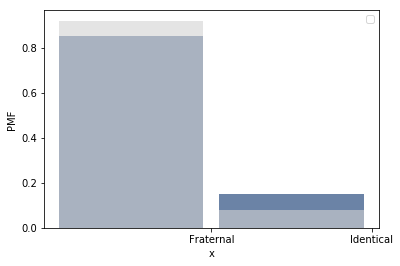

In [28]:
twins_post = twins.Copy()
twins_post['Identical'] *= 1 #This line is sort of unnecessary
twins_post['Fraternal'] *= 0.5
twins_post.Normalize()
thinkplot.Hist(twins_post)
thinkplot.Hist(twins, color='lightgray')
thinkplot.Config(xlabel='x', ylabel='PMF')
print('Likelihood of Identical Twins: %s' %twins_post['Identical'])

So, it still seems unlikely, but there is now about a 15% chance that Elvis was an indentical twin.

### Additional data?
But none of this is new. My argument is that we are given more than just this piece of data, and in fact that this one is relatively minor next to the simultaneously more and less obvious bit of information also in the first sentence: Elvis' brother _died._ 

Today, the infant mortality rate for identical twins is about 0.4 to 0.5 (found [here](https://www.diffen.com/difference/Fraternal_Twins_vs_Identical_Twins#Risks)). This is much higher than either "singletons" or fraternal twins, mostly due to the increased risk of umbilical cord tangling. For fraternal twins, the rate is 20 in 1000, or 0.02(found [here](https://www.nhs.uk/news/pregnancy-and-child/twins-more-likely-to-die-before-first-birthday/). It might actually be more fair to say that the death rate among fraternal twins is about 5 times higher than that of the general poulation, which seems to be true [internationally](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1365-3156.2007.01959.x), giving numbers closer to 0.25 in developing nations.). 

But that information is all for today, and Elvis was not born today; he was born in 1935. Obviously, the modern world will have slightly different infant mortality rates from 1935 Mississippi. Fortunately for us, most of the data we need exists in [this](https://www.cdc.gov/nchs/data/vsushistorical/birthstat_1935.pdf) very commonly cited study, coincidentally done in 1935. It gives us pretty accurate numbers for twins, which tell us that the mortality rate for twins in 1935 in Mississippi was 0.13. Next, we have to extrapolate a little bit. The two numbers I used in the paragraph above this one were both world averages. This means they factor in both rich, developed countries and poorer developing ones. Coincidentally, this seems to give a good approximation for most of the numbers for infant mortality rates in 1935 Mississipi. Overall infant mortality rates match within a couple percentage points, and taking the 5 times overall mortality rate rule into effect, it isn't far off. 

For this reason (and I want this to be clear), I am making a pretty bold assumption: the world average for identical twin mortality rates is probably about equal to what it was in Mississippi in 1935. The resultin numbers are only as valid as you think that claim is. But, operating on that assumption, we get a Likelihood that he died being an identical twin of 0.45, and a likelihood that he died as a fraternal twin of 0.13. We perform the update:

No handles with labels found to put in legend.


Likelihood of Identical Twins: 0.3757828810020877


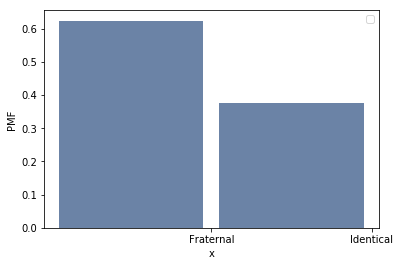

In [29]:
twins_post2 = twins_post.Copy()
twins_post2['Identical'] *= 0.45
twins_post2['Fraternal'] *= 0.13
twins_post2.Normalize()
thinkplot.Hist(twins_post2)
thinkplot.Config(xlabel='x', ylabel='PMF')
print('Likelihood of Identical Twins: %s' %twins_post2['Identical'])

There is now a 37.5% chance that Elvis was an identical twin. Still not as likely as fraternal, but a definite possibility.

No handles with labels found to put in legend.


Likelihood of Identical Twins: 0.2313624678663239


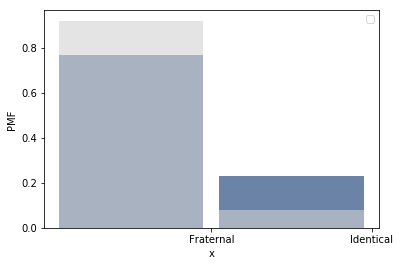

In [30]:
twins_post2 = twins.Copy()
twins_post2['Identical'] *= 0.45
twins_post2['Fraternal'] *= 0.13
twins_post2.Normalize()
thinkplot.Hist(twins_post2)
thinkplot.Hist(twins, color='lightgray')
thinkplot.Config(xlabel='x', ylabel='PMF')
print('Likelihood of Identical Twins: %s' %twins_post2['Identical'])

This plot shows pretty clearly that the information that Elvis had a dead twin is actually more informative than the information that he had a brother; it alone gives a 23% chance that Elvis was an identical twin.